In [131]:
import numpy as np
import matplotlib.pyplot as plt

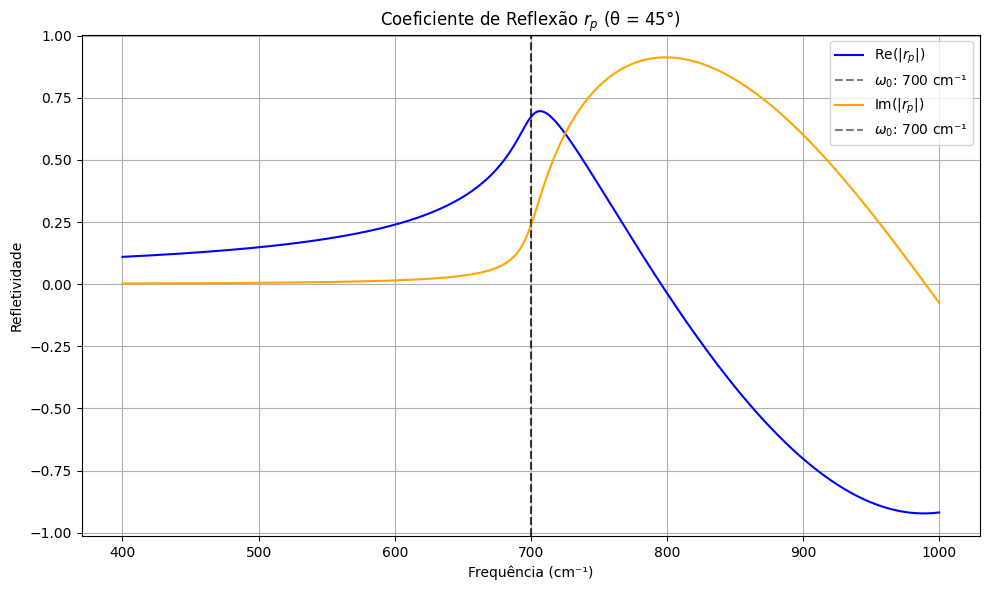

In [132]:
A = 700**2 #cm⁻2
omega0 = 700 #cm⁻¹
omega = 100 #cm⁻¹
gamma = 20 #cm⁻¹
theta_i = np.deg2rad(45)  # Ângulo de incidência de 45°

def epsilon(omega,  A, omega_0, gamma):
    denominator = (omega_0**2-omega**2-1.0j*omega*gamma)
    return 1 + A/denominator

def calcular_rp(omega_cm):
    epsilon_ar = 1.0  # Permissividade do ar
    epsilon_mat = epsilon(omega_cm, A, omega0, gamma)
    
    n1 = np.sqrt(epsilon_ar)  # Refrativo do ar (n1 = 1)
    n2 = np.sqrt(epsilon_mat)  # Refrativo do material (complexo)
    
    # Lei de Snell para θ_t (ângulo transmitido)
    sin_theta_t = (n1 / n2) * np.sin(theta_i)
    cos_theta_t = np.sqrt(1 - sin_theta_t**2)  # Assume meio não absorvedor para simplificar
    
    # Coeficiente de reflexão r_p
    rp = (n2 * np.cos(theta_i) - n1 * cos_theta_t) / (n2 * np.cos(theta_i) + n1 * cos_theta_t)
    return rp

omega_cm = np.linspace(400, 1000, 500)  # Faixa experimental em cm⁻¹
rp = np.array([calcular_rp(w) for w in omega_cm])

fig, axs = plt.subplots(figsize = (10,6),nrows=1, ncols=1)

axs.plot(omega_cm, rp.real, label='Re(|$r_p$|)', color='blue')
axs.set_xlabel('Frequência (cm⁻¹)')
axs.set_ylabel('Refletividade')
axs.set_title('Coeficiente de Reflexão $r_p$ (Real) (θ = 45°)')
axs.axvline(x=omega0, color='black', alpha = 0.5,linestyle='--', label=r'$\omega_0$'+f': {omega0} cm⁻¹')
axs.grid(True)
axs.legend()

axs.plot(omega_cm, rp.imag, label='Im(|$r_p$|)', color='orange')
axs.set_xlabel('Frequência (cm⁻¹)')
axs.set_ylabel('Refletividade')
axs.set_title('Coeficiente de Reflexão $r_p$ (θ = 45°)')
axs.axvline(x=omega0, color='black',alpha = 0.5,linestyle='--', label=r'$\omega_0$'+f': {omega0} cm⁻¹')
axs.grid(True)
axs.legend()

fig.tight_layout()
plt.show()

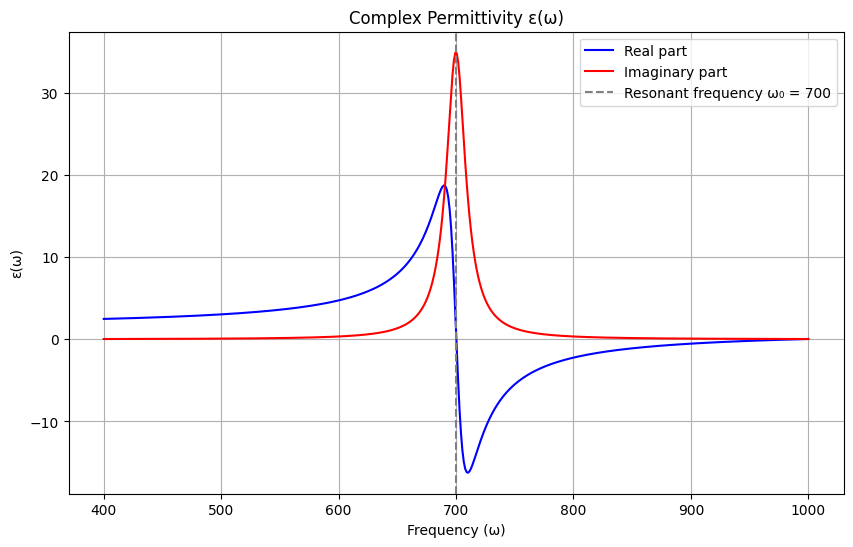

In [133]:
# Calculate epsilon for the range of omega
epsilon_values = epsilon(omega_cm, A, omega0, gamma)

# Plot the real and imaginary parts of epsilon
plt.figure(figsize=(10, 6))
plt.plot(omega_cm, np.real(epsilon_values), label='Real part', color='blue')
plt.plot(omega_cm, np.imag(epsilon_values), label='Imaginary part', color='red')

# Add labels and title
plt.xlabel('Frequency (ω)')
plt.ylabel('ε(ω)')
plt.title('Complex Permittivity ε(ω)')
plt.axvline(x=omega0, color='gray', linestyle='--', label=f'Resonant frequency ω₀ = {omega0}')
plt.legend()
plt.grid(True)
plt.show()

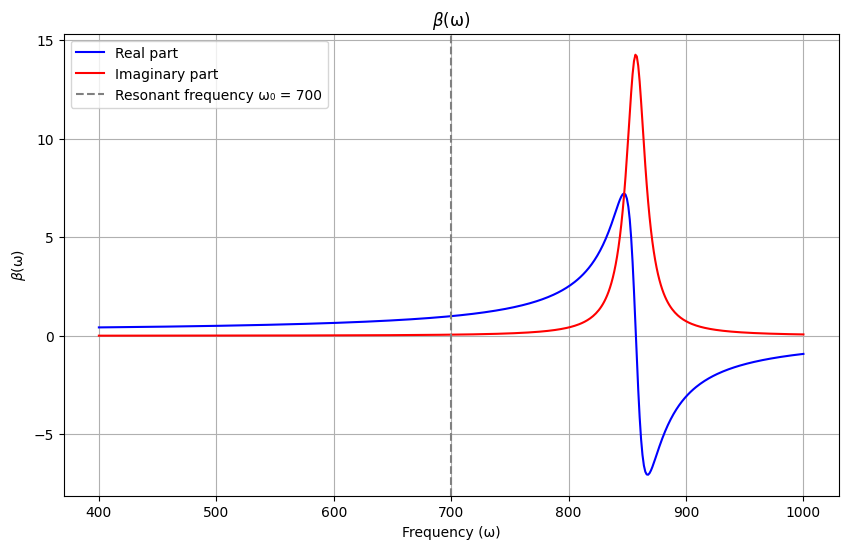

In [134]:
beta_values = (epsilon_values - 1)/(epsilon_values + 1)

# Plot the real and imaginary parts of epsilon
plt.figure(figsize=(10, 6))
plt.plot(omega_cm, np.real(beta_values), label='Real part', color='blue')
plt.plot(omega_cm, np.imag(beta_values), label='Imaginary part', color='red')

# Add labels and title
plt.xlabel('Frequency (ω)')
plt.ylabel(r'$\beta$(ω)')
plt.title(r'$\beta$(ω)')
plt.axvline(x=omega0, color='gray', linestyle='--', label=f'Resonant frequency ω₀ = {omega0}')
plt.legend()
plt.grid(True)
plt.show()

![alt text](image.png)


Analytical model for quantitative
prediction of material contrasts in
scattering-type near-field optical
microscopy

$$

\epsilon(\omega) =~ 1 + \frac{A_p}{\omega^2_0 - \omega^2 - i\gamma\omega} , \text{    }

\beta(\omega) = \frac{\epsilon(\omega) - 1}{\epsilon(\omega) +1}
\\
==============================
\\
r_p(\omega) = \frac{n_2(\omega) \cos{\theta_i} - n_1 \cos{(\theta_t(\omega))}}{n_2(\omega) \cos{\theta_i} + n_1 \cos{(\theta_t(\omega))}}, \\ \text{   } \\
\sin{(\theta_t(\omega))} = \frac{n_1}{n_2(\omega)}\sin{\theta_i}, 
\text{   } n_2(\omega) = \sqrt{\epsilon(\omega)} , \text{  } n_1 = n_{ar} = 1
\\
==============================
\\
\alpha_{eff}(\omega, t) = \frac{1}{2}\frac{\beta(\omega) f_0(t)}{1 - \beta(\omega) f_1(t)} + 1,\\ 
\text{ }\\
f_{0, 1}(t) = (g - \frac{\rho + 2H(t) + W_{0,1}}{2L})\frac{\ln{\frac{4L}{\rho + 4H(t) + 2W_{0,1}}}}{\ln{\frac{4L}{\rho}}}, 
\\ \text{ } \\ 
H(t) = H_0 + A(1 - \cos(\Omega t))

\\ \text{ } \\ 

W0 = 1.31\rho, \text{ } W1 = 0.5\rho, \text{ } g = 0.7e^{0.06i}

\\
==============================
\\
S_n(\omega) = \ \int_{0}^{\frac{2\pi}{\Omega}} (1 + r_p(\omega))^2 \alpha_{eff}(\omega, t) e^{-i n \Omega t} \,dt \

$$
 A = 20nm, $\rho $ = 20nm, L = 300nm

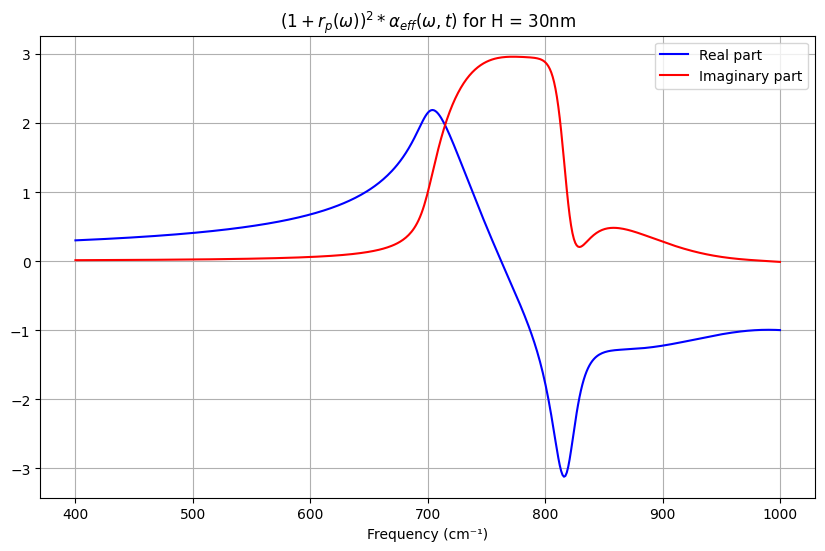

In [135]:
g = 0.7*(np.cos(0.06) + 1.0j*np.sin(0.06))

delta_z = 18*1e-9 #m
radius = 20*1e-9 #m
L = 300*1e-9 #m

H = 30*1e-9 #m por enquanto
H_values = np.linspace(0.1, 35, 500)*1e-9  

W0 = 1.31*radius
W1 = 0.5*radius

def f_parameter(g, radius, H, W, L):
    f = (g - (radius +2*H + W)/(2*L))*(np.log(4*L/(radius + 4*H +2*W)))/np.log(4*L/radius)
    return f

f0, f1 = (f_parameter(g, radius, H, aux_W, L) for aux_W in (W0, W1))

beta = beta_values#[-200]
alpha_eff = 1 + 0.5 * (beta*f0)/(1 - beta*f1)

integrand = ((1+rp)**2)*(alpha_eff)


plt.figure(figsize=(10, 6))
plt.plot(omega_cm, np.real(integrand)-1, label='Real part', color='blue')
plt.plot(omega_cm, np.imag(integrand), label='Imaginary part', color='red')

# Add labels and title
plt.xlabel('Frequency (cm⁻¹)')
# plt.ylabel(r'Integrand')
plt.title(r'$(1+r_p(\omega))^2*\alpha_{eff}(\omega, t)$ for H = 30nm')
# plt.axvline(x=omega0, color='gray', linestyle='--', label=f'Resonant frequency ω₀ = {omega0}')
plt.legend()
plt.grid(True)
plt.show()


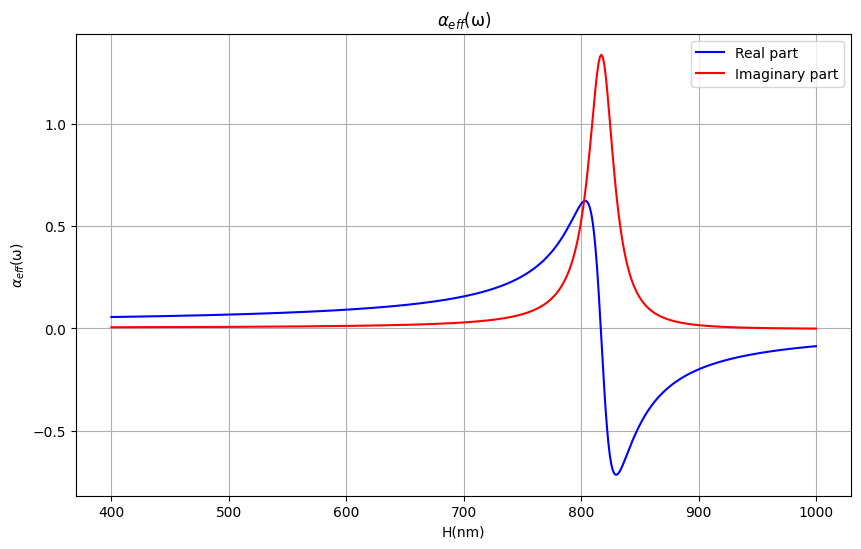

In [136]:


plt.figure(figsize=(10, 6))
plt.plot(omega_cm, np.real(alpha_eff)-1, label='Real part', color='blue')
plt.plot(omega_cm, np.imag(alpha_eff), label='Imaginary part', color='red')

# Add labels and title
plt.xlabel('H(nm)')#('Frequency (ω)')
plt.ylabel(r'$\alpha_{eff}$(ω)')
plt.title(r'$\alpha_{eff}$(ω)')
# plt.axvline(x=omega0, color='gray', linestyle='--', label=f'Resonant frequency ω₀ = {omega0}')
plt.legend()
plt.grid(True)
plt.show()

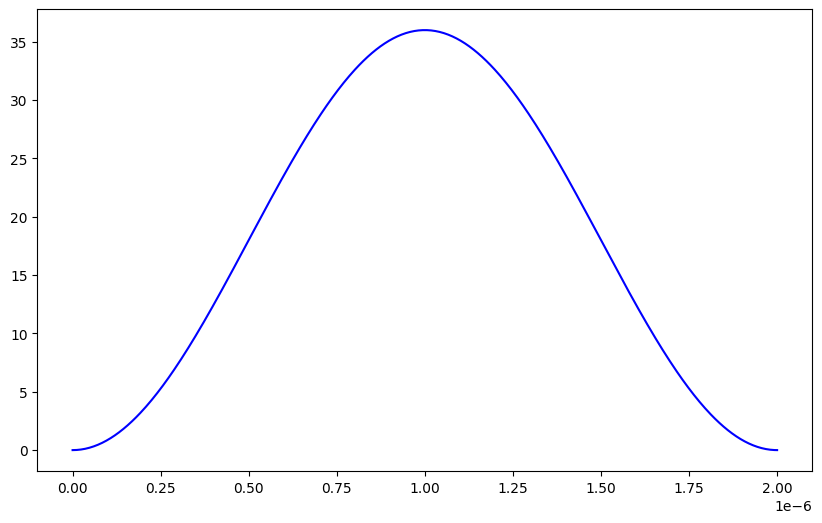

In [137]:
Omega = 2*np.pi*(500*1e3) #rad/s

time_vector = np.linspace(0, 2*np.pi/Omega, 500)  # seconds

h_values = delta_z*(1 - np.cos(Omega*time_vector))
plt.figure(figsize=(10, 6))
plt.plot(time_vector,h_values*1e9, label='H', color='blue')




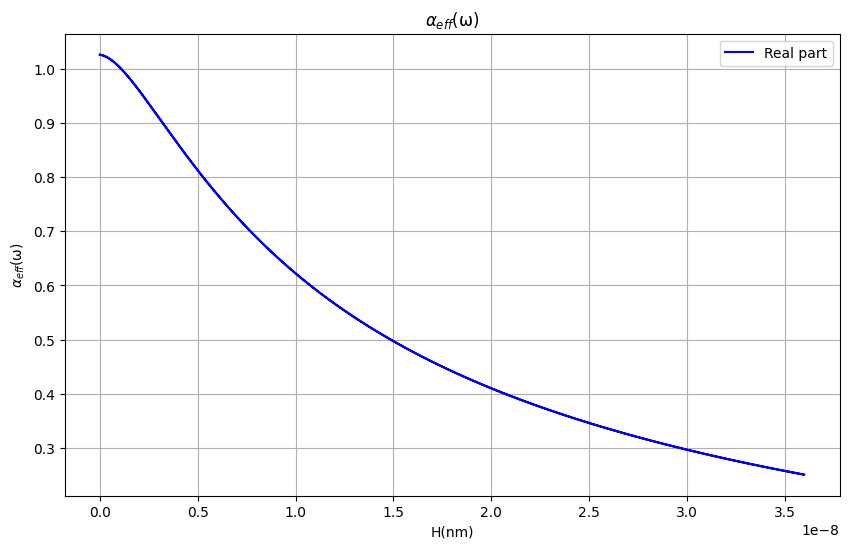

In [138]:
g = 0.7*(np.cos(0.06) + 1.0j*np.sin(0.06))

delta_z = 18*1e-9 #m
radius = 20*1e-9 #m
L = 300*1e-9 #m

# H = 30*1e-9 #m por enquanto
# H_values = np.linspace(0.1, 35, 500)*1e-9  

W0 = 1.31*radius
W1 = 0.5*radius

def f_parameter(g, radius, H, W, L):
    f = (g - (radius +2*H + W)/(2*L))*(np.log(4*L/(radius + 4*H +2*W)))/np.log(4*L/radius)
    return f

f0, f1 = (f_parameter(g, radius, h_values, aux_W, L) for aux_W in (W0, W1))

beta = beta_values[-200]
alpha_eff = 1 + 0.5 * (beta*f0)/(1 - beta*f1)

plt.figure(figsize=(10, 6))
plt.plot(h_values, np.real(alpha_eff)-1, label='Real part', color='blue')
#plt.plot(h_values, np.imag(alpha_eff), label='Imaginary part', color='red')

# Add labels and title
plt.xlabel('H(nm)')#('Frequency (ω)')
plt.ylabel(r'$\alpha_{eff}$(ω)')
plt.title(r'$\alpha_{eff}$(ω)')
# plt.axvline(x=omega0, color='gray', linestyle='--', label=f'Resonant frequency ω₀ = {omega0}')
plt.legend()
plt.grid(True)
plt.show()

In [139]:

f0, f1 = (f_parameter(g, radius, H, aux_W, L) for aux_W in (W0, W1))

beta = beta_values#[-200]
alpha_eff = 1 + 0.5 * (beta*f0)/(1 - beta*f1)

integrand = ((1+rp)**2)*(alpha_eff)

In [140]:
integrand_omega_t = np.ndarray(shape=[len(omega_cm), len(time_vector)], dtype=np.complex128)

for i in range(0, len(omega_cm)):
    for j in range(0, len(time_vector)):
        
        f0, f1 = (f_parameter(g, radius, h_values[j], aux_W, L) for aux_W in (W0, W1))

        beta = beta_values[i]
        alpha_eff = 1 + 0.5 * (beta*f0)/(1 - beta*f1)
        n = 1
        integrand_omega_t[i, j] = ((1+rp[i])**2)*(alpha_eff) * (np.exp(-1.0j * Omega * n * time_vector[j]))


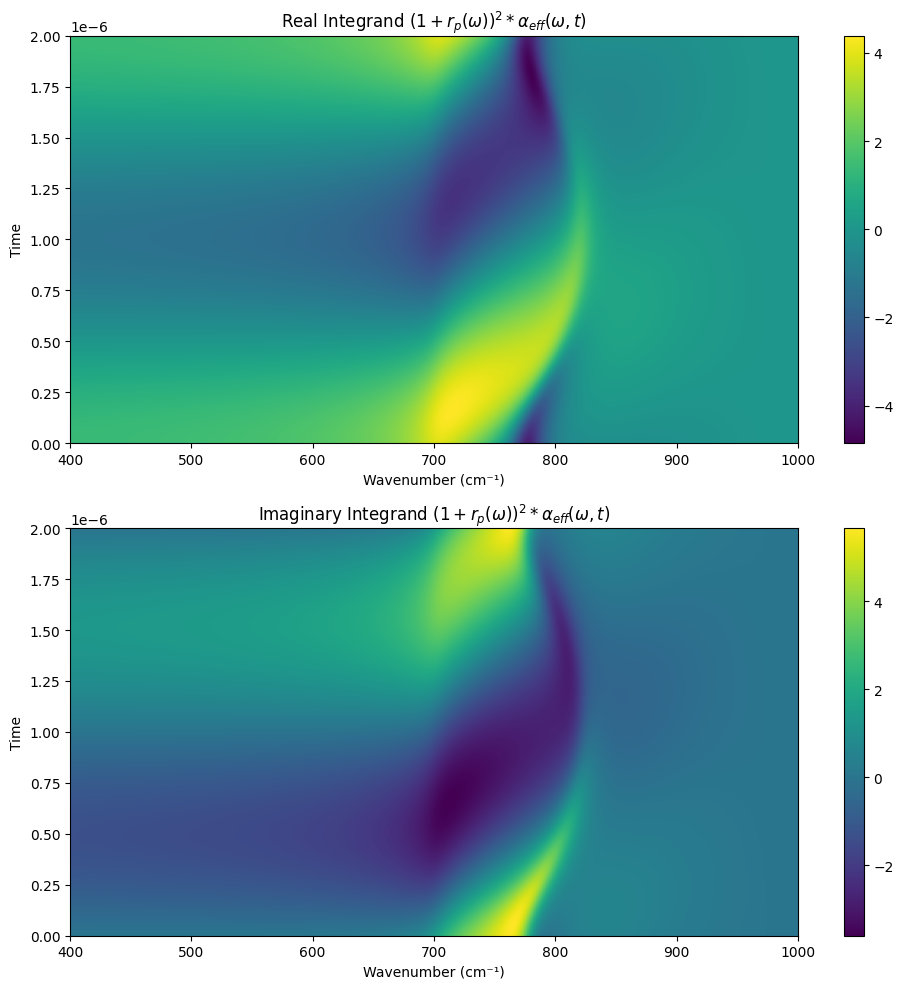

In [141]:
plot_data = np.real(integrand_omega_t.T)  # Transpose for correct axis orientation

# Create figure
# plt.figure(figsize=(10, 6))
fig, axs = plt.subplots(figsize = (10,10),nrows=2, ncols=1)

# Plot with imshow
img0 = axs[0].imshow(np.real(integrand_omega_t.T),
                 aspect='auto',
                 origin='lower',
                 extent=[omega_cm.min(), omega_cm.max(),  # x-axis (omega)
                         time_vector.min(), time_vector.max()],  # y-axis (time)
                 cmap='viridis')

# Add labels and colorbar
# axs[0].set_colorbar(label='Magnitude of Integrand')
axs[0].set_xlabel('Wavenumber (cm⁻¹)')
axs[0].set_ylabel('Time')
axs[0].set_title(r'Real Integrand $(1+r_p(\omega))^2*\alpha_{eff}(\omega, t)$')
fig.colorbar(img0, ax=axs[0])

img1 = axs[1].imshow(np.imag(integrand_omega_t.T),
                 aspect='auto',
                 origin='lower',
                 extent=[omega_cm.min(), omega_cm.max(),  # x-axis (omega)
                         time_vector.min(), time_vector.max()],  # y-axis (time)
                 cmap='viridis')

# Add labels and colorbar
# axs[0].colorbar(label='Magnitude of Integrand')
axs[1].set_xlabel('Wavenumber (cm⁻¹)')
axs[1].set_ylabel('Time')
axs[1].set_title(r'Imaginary Integrand $(1+r_p(\omega))^2*\alpha_{eff}(\omega, t)$')
fig.colorbar(img1, ax=axs[1])


# Optimize layout
plt.tight_layout()
plt.show()

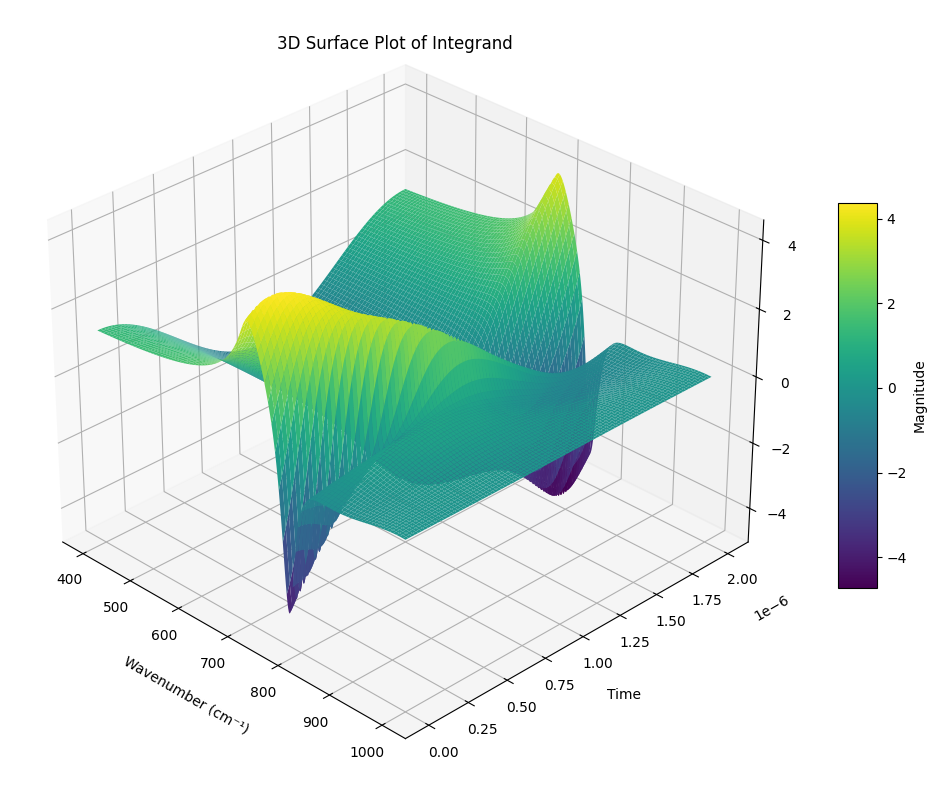

In [142]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Assuming you have:
# - omega_cm (1D array)
# - time_vector (1D array)
# - integrand_omega_t (2D complex array of shape [len(omega_cm), len(time_vector)])

# Convert complex values to magnitude (or other representation)
z_data = np.real(integrand_omega_t.T)  # Transpose for axis alignment
# Alternatives: np.real(), np.imag(), np.angle()

# Create grid for 3D plotting
X, Y = np.meshgrid(omega_cm, time_vector)  # X = omega_cm, Y = time

# Create figure and 3D axis
fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111, projection='3d')

# Plot surface
surf = ax.plot_surface(X, Y, z_data, 
                      cmap='viridis',      # Color map
                      rstride=5,           # Row sampling (reduce for smoother)
                      cstride=5,           # Column sampling
                      antialiased=True,
                      linewidth=0.1)

# Add labels and colorbar
ax.set_xlabel('Wavenumber (cm⁻¹)', labelpad=12)
ax.set_ylabel('Time', labelpad=12)
# ax.set_zlabel('|Integrand|', labelpad=12)
fig.colorbar(surf, ax=ax, shrink=0.5, aspect=10, label='Magnitude')

# Adjust viewing angle
ax.view_init(elev=30, azim=-45)  # Elevation and azimuth angles

# Add title
plt.title('3D Surface Plot of Integrand', y=1.02)

plt.tight_layout()
plt.show()